# 06 Oct 22 - Activity: Analyzing Lagrangian Dynamics with Constraints

One of the strengths of Lagrangian dynamics is that you do not have to have a mathematical description of the forces for all space and time. We can see that in this upside-down ice cream cone problem. How would you write the force of the cone for all space and time?

*Answer:* :shrugs:

![Rubric](../../assets/images/cylindrical_cone_mass.jpg)

## Last time

We used Lagrangian Analysis to produce the following differential equations:

$$m\ddot{r} = (mr^2\dot{\theta}-mg\cot\alpha)\cos^2\alpha$$

$$\dfrac{d}{dt}\left(mr^2\dot{\theta}\right) = 0$$

We made a note that the second one tells about conservation of angular momentum in the $z$-direction.


Let's write this a bit different, so we can integrate the situation:

$$m\ddot{r} = (mr^2\dot{\theta}-mg\cot\alpha)\cos^2\alpha$$

$$2mr\dot{r}\dot{\theta}+mr^2\ddot{\theta} = 0$$

Now we need to write this as a set of first order differential equations. Let $v=\dot{r}$ and $\omega=\dot{\theta}$. Then we get the following four equations

$$\dot{r} = v$$

$$\dot{v} = \left(r^2\omega-g\cot\alpha\right)\cos^2\alpha$$

$$\dot{\theta} = \omega$$

$$\dot{\omega} = -2\dfrac{v\omega}{r}$$

## Numerically Integrate our EOM

Now we have four 1st order, coupled, nonlinear differential equations that describe the motion of this bead. We are going to solve for $r(t)$ and $\theta(t)$ for a given choice of $\alpha$. This will produce a solution for $z(t) = \dfrac{r(t)}{\tan\alpha}$.  Let's pick some initial conditions and build a numerical model. 

Using the integrator of your choice, numerically integrate and plot (in 3d) the motion of the bead for the following conditions:

1. Bead starts from rest and is let go
2. Bead starts at a given height and is given a low speed (less than needed to orbit)
3. Bead starts at a given height and is given a low speed (more than needed to orbit)
4. Can you find a flat horizontal orbit?

We have written the code below so that you could use odeint if you choose.

The goals for this work is to:

1. Integrate the equations of motion numerically.
2. Plot the motion in various ways (2D slices and 3D space)

We can then use those elements to extract some physics. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
plt.rcParams['text.usetex'] = True


def BeadStuckOnCone(x, t, g=9.8, alpha=np.pi/3):
    
    r, v, theta, omega = x
    dxdt = [v, (r*omega**2-g/np.tan(alpha))*np.cos(alpha)**2, omega, -2*v*omega/r]
    return dxdt

g = 9.8
alpha = np.pi/3

y0 = [10,0,0,0.0565]  
t = np.linspace(0,200,1001)

In [2]:
sol = odeint(BeadStuckOnCone, y0,t)
r = sol[:,0]
vr = sol[:,1]
theta = sol[:,2]
omega = sol[:,3]
x = r*np.cos(theta)
y = r*np.sin(theta)
z = r/np.tan(alpha)

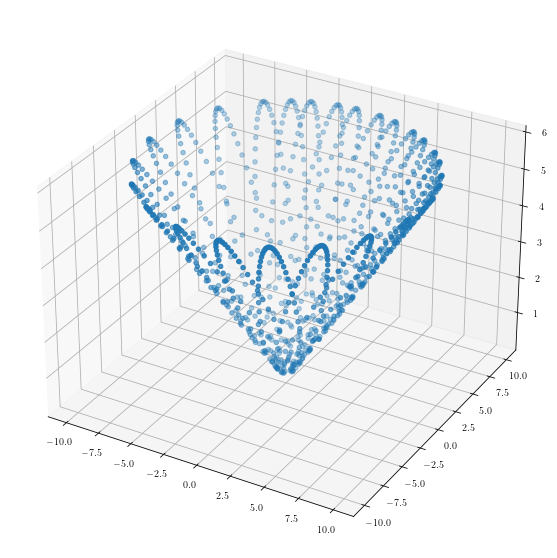

In [3]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)


### Analysis of the Energy

We know that this is a system that should conserve energy. There's no dissipation and there's only conservatives forces acting to change the speed of the object. The contact forces only change direction, so the system is "conservative".

Let's compute the energy:

$$T = \dfrac{m}{2}\left(\dot{r}^2 + r^2\dot{\theta}^2 + \dot{z}^2\right) = \dfrac{m}{2}\left(\dot{r}^2\csc^2\alpha + r^2\dot{\theta}^2\right)$$

$$U = mgz = mgr\cot\alpha$$

We have all these quantities except $m$. Let's divide it out for just set it to 1. The code below computes and plots the energies.

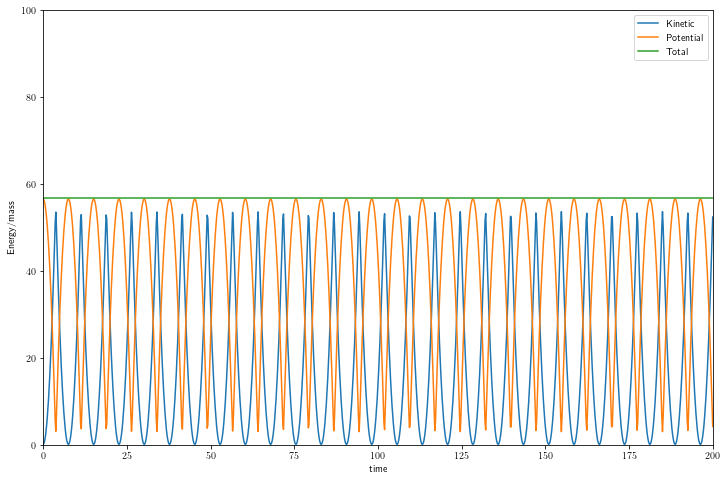

In [4]:
## Kinetic
T = 0.5*(vr**2/np.cos(alpha)**2+(r*omega)**2)

## Potetial
U = g*r/np.tan(alpha)

## Total
E=T+U

ax = plt.figure(figsize=(12,8))
plt.plot(t, T, label='Kinetic')
plt.plot(t, U, label='Potential')
plt.plot(t, E, label='Total')
plt.axis([0, 200, 0, 100])
plt.legend()
plt.xlabel('time')
plt.ylabel('Energy/mass');

## Angular Momentum Analysis

We argued that the equation 
$$\dfrac{d}{dt}\left(mr^2\dot{\theta}\right) = 0$$
was a statement of conservation of the z-component of angular momentum.

Recall that angular momentum is a vector quantity and can be conserved in total, but also a given component might be conserved while others are not. Let's compute the angular momentum and see what the deal is. This will involve taken cross products in cylindrical coordinates (which also obey the right hand rule!).

Starting with the classical relationship:

$$\dfrac{\mathbf{L}}{m} = \mathbf{r} \times \mathbf{v}$$

We can write down position and velocity vectors in general:

$$\mathbf{r} = r\hat{r} + z\hat{z}$$
$$\mathbf{v} = v_r\hat{r} + v_{\theta}\hat{\theta} + v_z \hat{z}$$

Let's take the cross product:

$$\mathbf{r} \times \mathbf{v} = \left(r\hat{r} + z\hat{z}\right) \times
\left( v_r\hat{r} + v_{\theta}\hat{\theta} + v_z \hat{z} \right)$$

Which is

$$\dfrac{\mathbf{L}}{m} = \mathbf{r} \times \mathbf{v} = -(z v_{\theta})\hat{r} + (z v_r -r v_z)\hat{\theta} + rv_{\theta}\hat{z}$$

Or:

$$\dfrac{L_r}{m} = -(z v_{\theta})$$

$$\dfrac{L_{\theta}}{m} = (z v_r -r v_z)$$

$$\dfrac{L_z}{m} = rv_{\theta}$$

Yep, $L_z$ just pops out:

$$\dfrac{L_z}{m} = rv_{\theta} = r^2\dot{\theta}$$

$$L_z = m r^2\dot{\theta}$$

A good physics question is 'why?'

Let's plot it

Text(0, 0.5, '$L_z/m$')

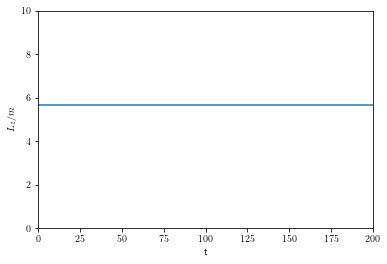

In [5]:
# CONSERVED! 
# Lz Angular momentum

Lz = r**2*omega

plt.plot(t,Lz)
plt.axis([0, 200, 0, 10])
plt.xlabel('t')
plt.ylabel(r'$L_z/m$')

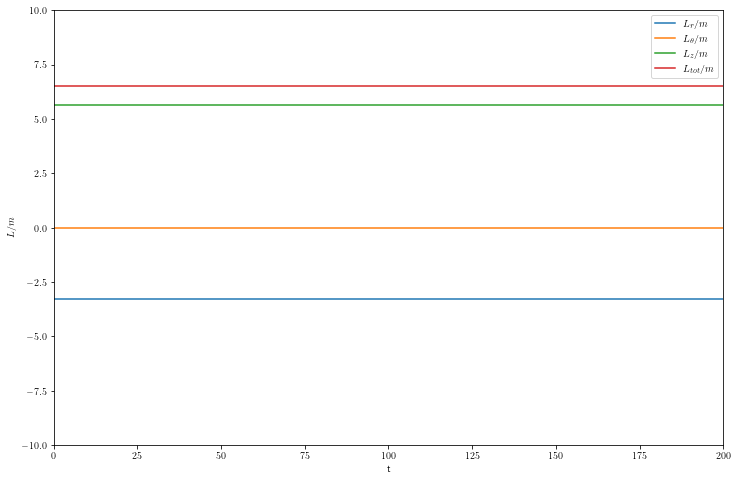

In [6]:
# All the Angular momentum is conserved!

Lr = -r*omega*z
Ltheta = z*vr-r*vr/np.tan(alpha)
Lz = r**2*omega

Ltotal = np.sqrt(Lr**2+Ltheta**2+Lz**2)

ax = plt.figure(figsize=(12,8))
plt.plot(t, Lr, label=r'$L_r/m$')
plt.plot(t,Ltheta, label=r'$L_{\theta}/m$')
plt.plot(t, Lz, label=r'$L_z/m$')
plt.plot(t, Ltotal, label=r'$L_{tot}/m$')

plt.axis([0, 200, -10, 10])
plt.xlabel('t')
plt.ylabel(r'$L/m$')
plt.legend()
